In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
data = pd.read_csv("/home/ghost/dataSets/heart.csv")   #Imports the dataset
print(data.describe(include=[object]).T) #Describes object variables in the dataset

print("******************************************************************")

print(data.describe().T)   #Describes numeric variables in the dataset

               count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460
******************************************************************
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


In [3]:
print(data.head(6)) #Displays first 6 raws of the dataset

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  


In [4]:
print(data.info())   #additional information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [40]:
data_encoded = pd.get_dummies(data) 
data_encoded = pd.get_dummies(data_encoded, columns = ["FastingBS"])  #Converts cathegorical data to bool variables
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   MaxHR              918 non-null    int64  
 4   Oldpeak            918 non-null    float64
 5   HeartDisease       918 non-null    int64  
 6   Sex_F              918 non-null    bool   
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ASY  918 non-null    bool   
 9   ChestPainType_ATA  918 non-null    bool   
 10  ChestPainType_NAP  918 non-null    bool   
 11  ChestPainType_TA   918 non-null    bool   
 12  RestingECG_LVH     918 non-null    bool   
 13  RestingECG_Normal  918 non-null    bool   
 14  RestingECG_ST      918 non-null    bool   
 15  ExerciseAngina_N   918 non-null    bool   
 16  ExerciseAngina_Y   918 non

In [41]:
x = data_encoded.drop("HeartDisease", axis = 1)
y = data_encoded["HeartDisease"]   #Splits features and target

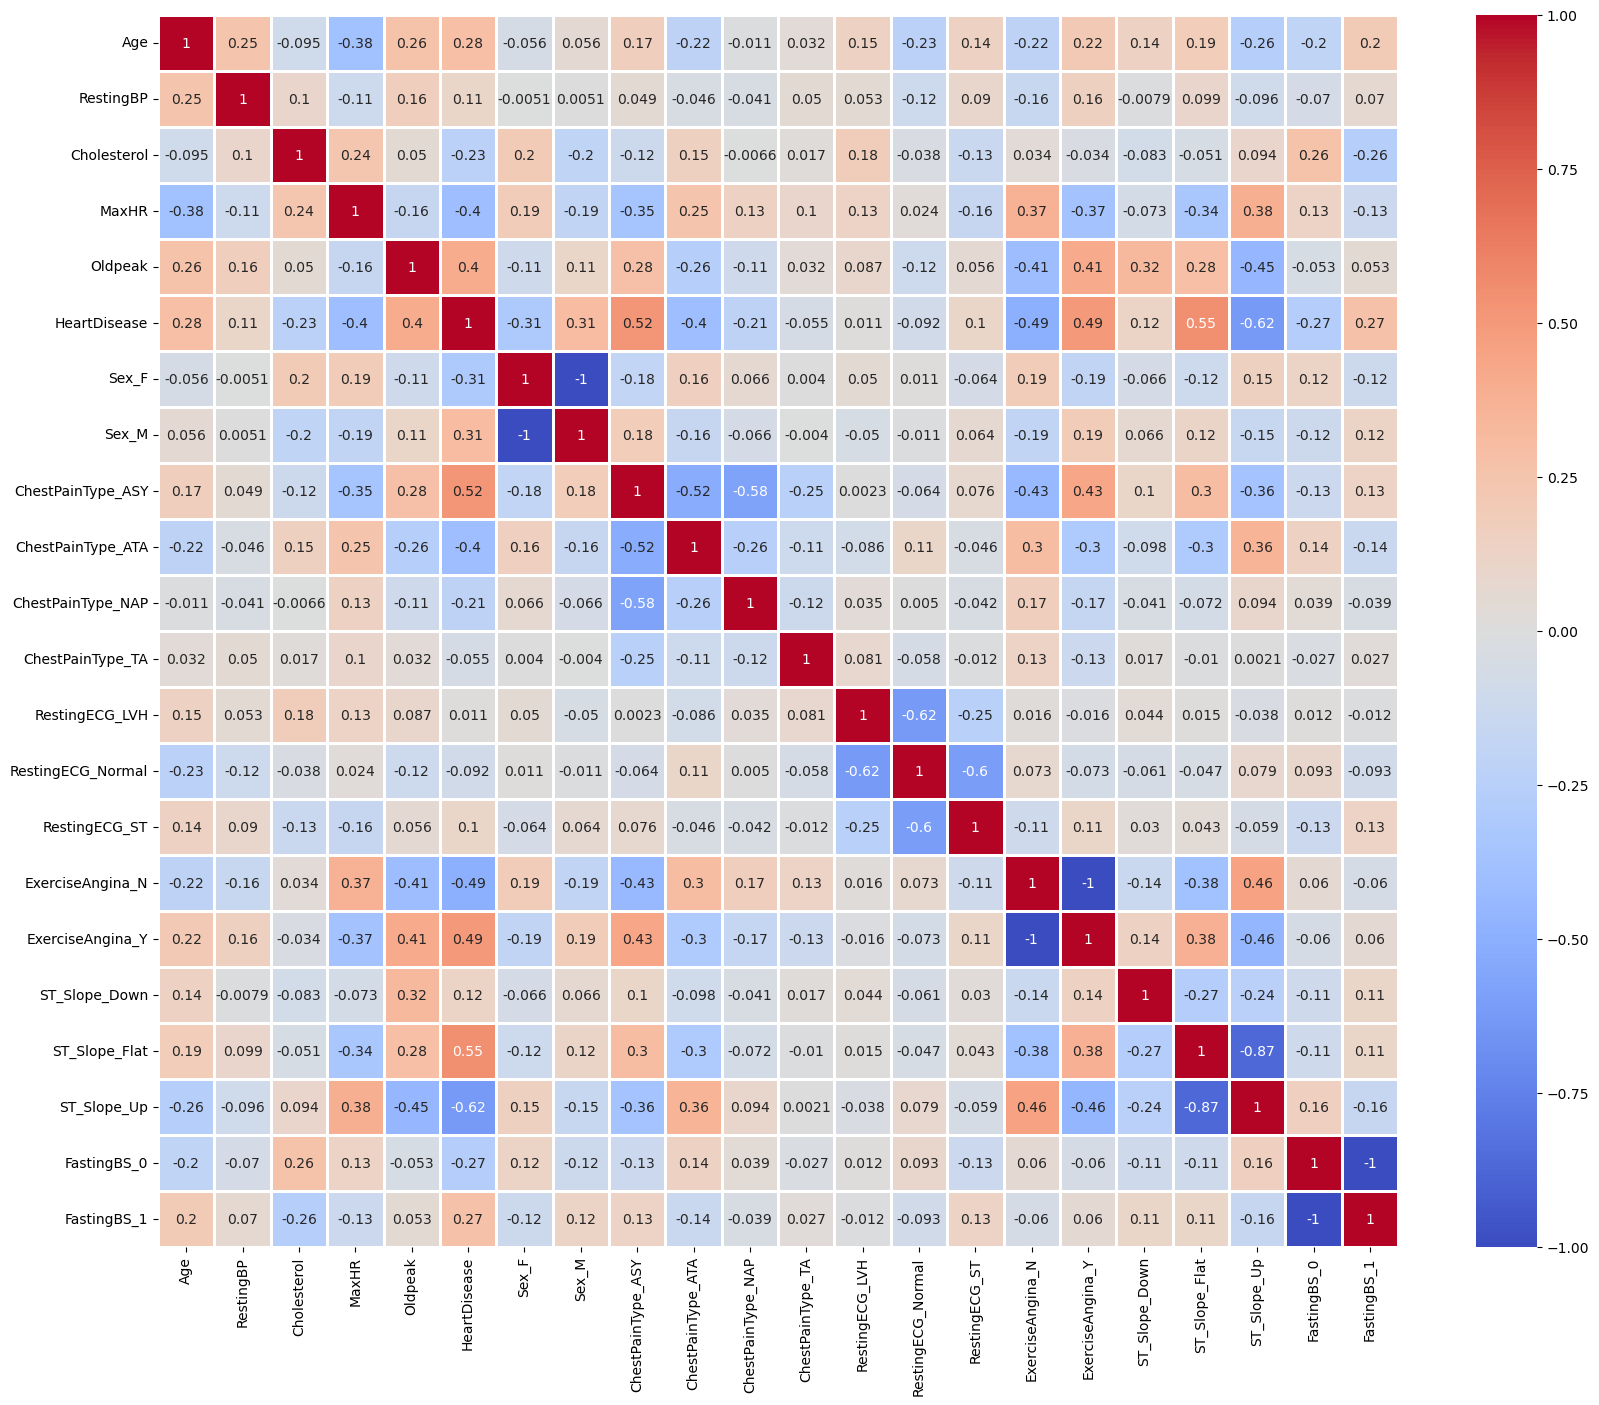

In [59]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_encoded.corr(), annot = True, cmap = "coolwarm",linewidths = 1) #Draws a heatmap for showing correlations
plt.show()